## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
#from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
from IPython import display


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [3]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')
        
root_path = 'fmnist'
mkdir(root_path)

Directory fmnist is created!


In [4]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
                                                        train=True, 
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path, 
                                                       train=False, 
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



In [5]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

tensor(8)


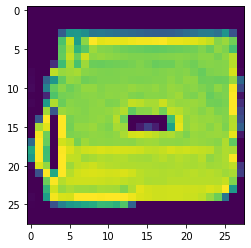

In [5]:
# len(fmnist_dataset_train)
dataiter = iter(train_loader)
img, lab = dataiter.next() 
plt.imshow(img[1][0])
print(lab[1])

torch.Size([128, 1, 28, 28])
128


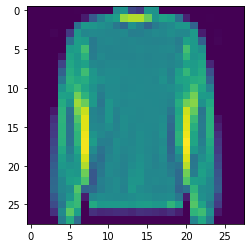

In [6]:

for img, label in train_loader:
    print(img.shape)
    plt.imshow(img[1][0])
    print(label.size(0))
    break

### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [125]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 300),
            nn.BatchNorm1d(300),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(100, 10),
            nn.LogSoftmax(dim=1)
            
        )
  
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [126]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 300]         235,500
       BatchNorm1d-3                  [-1, 300]             600
           Dropout-4                  [-1, 300]               0
              ReLU-5                  [-1, 300]               0
            Linear-6                  [-1, 100]          30,100
           Dropout-7                  [-1, 100]               0
              ReLU-8                  [-1, 100]               0
            Linear-9                   [-1, 10]           1,010
       LogSoftmax-10                   [-1, 10]               0
Total params: 267,210
Trainable params: 267,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.02
Estimated T

Your experiments come here:

In [127]:
from tensorflow.keras.optimizers import SGD
from torch.autograd import Variable
#model = TinyNeuralNetwork().to(device)
model = TinyNeuralNetwork()
learning_rate = 0.001
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) # YOUR CODE HERE
optimizer = Adam(model.parameters(), lr=1e-3)
error = nn.CrossEntropyLoss() # YOUR CODE HERE
#error = nn.NLLLoss()
# Your experiments, training and validation loops here
# Traning the Model
count = 0

loss_train_1 = []
loss_test_1 = []

accuracy_train_1 = []
accuracy_test_1 = []

for epoch in range(30):
    loss_train_epoch = []
    loss_test_epoch = []
    accuracy_train_epoch = []
    accuracy_test_epoch = []
    
    model.train(True)
    for i, (images, labels) in enumerate(train_loader):

            optimizer.zero_grad()
            outputs = model(images)
            loss = error(outputs, labels)
            loss.backward()
            optimizer.step()

            predicted1 = torch.max(outputs.data, 1)[1]
            total1 = len(labels)
            correct1 = (predicted1 == labels).sum()
            accuracy1 = 100 * correct1 / float(total1)
            accuracy_train_epoch.append(accuracy1)
            loss_train_epoch.append(loss.item())
            count += 1

    model.train(False) 
    with torch.no_grad():
        correct2 = 0
        total2 = 0
        for test_images, labels in test_loader: 

            outputs = model(test_images)
            loss_ = error(outputs, labels)
            predicted2 = torch.max(outputs.data, 1)[1]

            total2 += len(labels)
            correct2 += (predicted2 == labels).sum()
            loss_test_epoch.append(loss_.item())

        accuracy2 = 100 * correct2 / float(total2)
        accuracy_test_epoch.append(accuracy2)  
    
    accuracy_train_1.append(np.mean(accuracy_train_epoch))
    accuracy_test_1.append(np.mean(accuracy_test_epoch))
    loss_train_1.append(np.mean(loss_train_epoch))
    loss_test_1.append(np.mean(loss_test_epoch))
    print('Epoch: {}  Loss: {}  Accuracy: {}%'.format(epoch+1, loss_test_1[-1], accuracy2))



Epoch: 1  Loss: 0.4335819575935602  Accuracy: 84.1500015258789%
Epoch: 2  Loss: 0.40124483294785024  Accuracy: 84.9800033569336%
Epoch: 3  Loss: 0.38717888221144675  Accuracy: 85.47000122070312%
Epoch: 4  Loss: 0.37023712880909443  Accuracy: 86.3499984741211%
Epoch: 5  Loss: 0.3561938237398863  Accuracy: 86.95999908447266%
Epoch: 6  Loss: 0.3557072799652815  Accuracy: 86.61000061035156%
Epoch: 7  Loss: 0.35016449391841886  Accuracy: 86.94000244140625%
Epoch: 8  Loss: 0.3422110477462411  Accuracy: 87.56999969482422%
Epoch: 9  Loss: 0.33892487846314906  Accuracy: 87.2300033569336%
Epoch: 10  Loss: 0.330271627753973  Accuracy: 87.83999633789062%
Epoch: 11  Loss: 0.33472130075097084  Accuracy: 87.83999633789062%
Epoch: 12  Loss: 0.3347094928845763  Accuracy: 87.45999908447266%
Epoch: 13  Loss: 0.32621710989624264  Accuracy: 87.80999755859375%
Epoch: 14  Loss: 0.3270407376810908  Accuracy: 88.04000091552734%
Epoch: 15  Loss: 0.3161382358521223  Accuracy: 88.37000274658203%
Epoch: 16  Loss: 

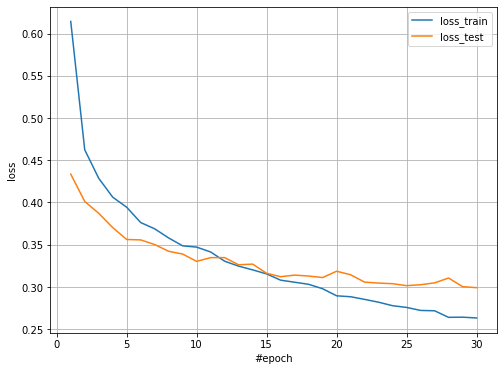

In [128]:
plt.figure(figsize=(8, 6))
plt.xlabel("#epoch")
plt.ylabel("loss")
plt.plot(np.arange(1,31), loss_train_1, label = 'loss_train')
plt.plot(np.arange(1,31), loss_test_1, label = 'loss_test')
plt.legend()
plt.grid(True)
plt.show()

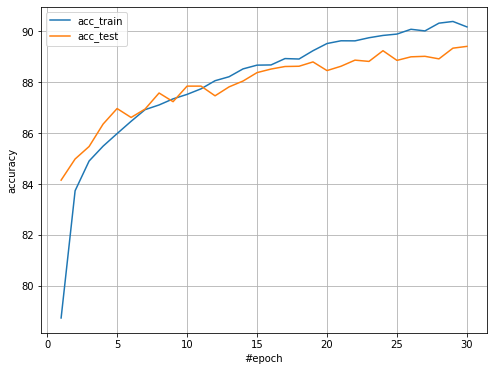

In [129]:
plt.figure(figsize=(8, 6))
plt.xlabel("#epoch")
plt.ylabel("accuracy")
plt.plot( np.arange(1,31), accuracy_train_1, label = 'acc_train')
plt.plot( np.arange(1,31), accuracy_test_1, label = 'acc_test')
plt.legend()
plt.grid(True)
plt.show()

In [130]:
dataiter = iter(test_loader)
img, lab = dataiter.next()
pred = model(img)
predict = torch.max(pred.data, 1)[1]
correct = (predict == lab).sum()
accuracy = 100 * correct / float(len(lab))

In [131]:
print("Accuracy: {} %".format(float(accuracy)))

Accuracy: 91.40625 %


### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [101]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, 1000),
            #nn.BatchNorm1d(400),
            nn.ReLU(),
            nn.Linear(1000, 500),
            #nn.BatchNorm1d(50),
            nn.ReLU(),
            nn.Linear(500,10),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [102]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 1000]         785,000
              ReLU-3                 [-1, 1000]               0
            Linear-4                  [-1, 500]         500,500
              ReLU-5                  [-1, 500]               0
            Linear-6                   [-1, 10]           5,010
        LogSoftmax-7                   [-1, 10]               0
Total params: 1,290,510
Trainable params: 1,290,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 4.92
Estimated Total Size (MB): 4.95
----------------------------------------------------------------


In [103]:
from torch.optim import Adam

model = OverfittingNeuralNetwork()
learning_rate = 0.001
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) # YOUR CODE HERE
optimizer = Adam(model.parameters(), lr=1e-3)
error = nn.CrossEntropyLoss() # YOUR CODE HERE
#error = nn.NLLLoss()
# Your experiments, training and validation loops here
# Traning the Model
count = 0

loss_train_2 = []
loss_test_2 = []
accuracy_train_2 = []
accuracy_test_2 = []

for epoch in range(30):
    loss_train_epoch = []
    loss_test_epoch = []
    accuracy_train_epoch = []
    accuracy_test_epoch = []
    model.train(True)
    for i, (images, labels) in enumerate(train_loader):
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        predicted1 = torch.max(outputs.data, 1)[1]
                
        total1 = len(labels)
        correct1 = (predicted1 == labels).sum()
        accuracy1 = 100 * correct1 / float(total1)
        accuracy_train_epoch.append(accuracy1)
        loss_train_epoch.append(loss.item())
        count += 1

    model.train(False) 
    with torch.no_grad():
        correct2 = 0
        total2 = 0
        for test_images, labels in test_loader: 

            outputs = model(test_images)
            loss_ = error(outputs, labels)
            predicted2 = torch.max(outputs.data, 1)[1]
            total2 += len(labels)
            correct2 += (predicted2 == labels).sum()
            loss_test_epoch.append(loss_.item())

        accuracy2 = 100 * correct2 / float(total2)
        accuracy_test_epoch.append(accuracy2)
    
    accuracy_train_2.append(np.mean(accuracy_train_epoch))
    accuracy_test_2.append(np.mean(accuracy_test_epoch))
    loss_train_2.append(np.mean(loss_train_epoch))
    loss_test_2.append(np.mean(loss_test_epoch))
    print('Epoch: {}  Loss: {}  Accuracy: {}%'.format(epoch+1, loss_test_2[-1], accuracy2))



Epoch: 1  Loss: 0.40851699747145176  Accuracy: 85.36000061035156%
Epoch: 2  Loss: 0.3708700008690357  Accuracy: 86.30999755859375%
Epoch: 3  Loss: 0.3791113644838333  Accuracy: 86.0%
Epoch: 4  Loss: 0.33851383440196514  Accuracy: 87.43000030517578%
Epoch: 5  Loss: 0.34784763492643833  Accuracy: 87.58000183105469%
Epoch: 6  Loss: 0.325207250751555  Accuracy: 88.5199966430664%
Epoch: 7  Loss: 0.3210659183561802  Accuracy: 88.5999984741211%
Epoch: 8  Loss: 0.31218937914818523  Accuracy: 88.87000274658203%
Epoch: 9  Loss: 0.31704743672162294  Accuracy: 88.69999694824219%
Epoch: 10  Loss: 0.3099165421910584  Accuracy: 89.11000061035156%
Epoch: 11  Loss: 0.3146308930590749  Accuracy: 89.19000244140625%
Epoch: 12  Loss: 0.3381859855726361  Accuracy: 88.88999938964844%
Epoch: 13  Loss: 0.31867095483466984  Accuracy: 89.41999816894531%
Epoch: 14  Loss: 0.33871578685939313  Accuracy: 88.95999908447266%
Epoch: 15  Loss: 0.3417554467916489  Accuracy: 89.0199966430664%
Epoch: 16  Loss: 0.3397552402

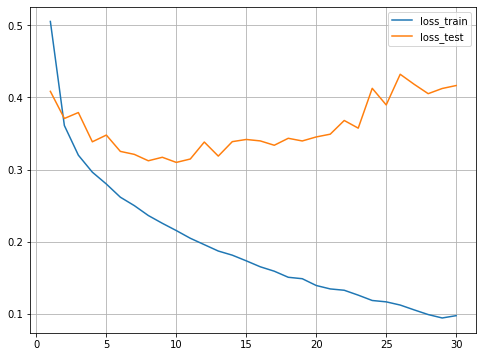

In [104]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1,31), loss_train_2, label = 'loss_train')
plt.plot(np.arange(1,31), loss_test_2, label = 'loss_test')
plt.legend()
plt.grid(True)
plt.show()

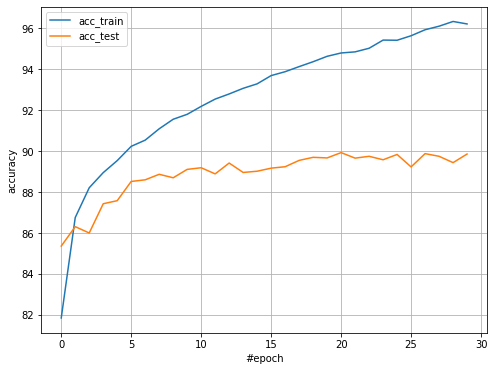

In [120]:
plt.figure(figsize=(8, 6))
plt.xlabel("#epoch")
plt.ylabel("accuracy")
plt.plot(accuracy_train_2, label = 'acc_train')
plt.plot(accuracy_test_2, label = 'acc_test')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
dataiter = iter(test_loader)
img, lab = dataiter.next()
pred = model(img)
predict = torch.max(pred.data, 1)[1]
correct = (predict == lab).sum()
accuracy = 100 * correct / float(len(lab))

In [107]:
print("Accuracy: {} %".format(float(accuracy)))

Accuracy: 89.0625 %


You can see from the picture that the model has really overfitted. The loss in training turned out to be much less, and the loss on the test began to grow at some point.

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results. 

In [108]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            #nn.BatchNorm1d(input_shape),
            nn.Linear(input_shape, 1000),
            nn.BatchNorm1d(1000),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(1000, 500),
            nn.BatchNorm1d(500),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(500,10),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [109]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 1000]         785,000
       BatchNorm1d-3                 [-1, 1000]           2,000
           Dropout-4                 [-1, 1000]               0
              ReLU-5                 [-1, 1000]               0
            Linear-6                  [-1, 500]         500,500
       BatchNorm1d-7                  [-1, 500]           1,000
           Dropout-8                  [-1, 500]               0
              ReLU-9                  [-1, 500]               0
           Linear-10                   [-1, 10]           5,010
       LogSoftmax-11                   [-1, 10]               0
Total params: 1,293,510
Trainable params: 1,293,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forw

In [110]:
model = FixedNeuralNetwork()
learning_rate = 0.001
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) # YOUR CODE HERE
optimizer = Adam(model.parameters(), lr=1e-3)
error = nn.CrossEntropyLoss() # YOUR CODE HERE
#error = nn.NLLLoss()
# Your experiments, training and validation loops here
# Traning the Model
count = 0

loss_train = []
loss_test = []

accuracy_train = []
accuracy_test = []

for epoch in range(30):
    loss_train_epoch = []
    loss_test_epoch = []
    accuracy_train_epoch = []
    accuracy_test_epoch = []
    model.train(True)
    for i, (images, labels) in enumerate(train_loader):

        optimizer.zero_grad()
        outputs = model(images)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()

        predicted1 = torch.max(outputs.data, 1)[1]
        total1 = len(labels)
        
        correct1 = (predicted1 == labels).sum()
        accuracy1 = 100 * correct1 / float(total1)
        accuracy_train_epoch.append(accuracy1)
        loss_train_epoch.append(loss.item())
        count += 1

    model.train(False) 
    with torch.no_grad():
        correct2 = 0
        total2 = 0
        for test_images, labels in test_loader: 
            outputs = model(test_images)
            loss_ = error(outputs, labels)
            predicted2 = torch.max(outputs.data, 1)[1]
            total2 += len(labels)
            correct2 += (predicted2 == labels).sum()
            loss_test_epoch.append(loss_.item())

        accuracy2 = 100 * correct2 / float(total2)
        accuracy_test_epoch.append(accuracy2)
    
    accuracy_train.append(np.mean(accuracy_train_epoch))
    accuracy_test.append(np.mean(accuracy_test_epoch))
    loss_train.append(np.mean(loss_train_epoch))
    loss_test.append(np.mean(loss_test_epoch))
    print('Epoch: {}  Loss: {}  Accuracy: {}%'.format(epoch+1, loss_test[-1], accuracy2))



Epoch: 1  Loss: 0.4167064778506756  Accuracy: 84.26000213623047%
Epoch: 2  Loss: 0.38014723025262354  Accuracy: 85.62000274658203%
Epoch: 3  Loss: 0.34778473787009717  Accuracy: 87.16999816894531%
Epoch: 4  Loss: 0.34054903835058215  Accuracy: 87.38999938964844%
Epoch: 5  Loss: 0.33164202570915224  Accuracy: 87.95999908447266%
Epoch: 6  Loss: 0.33451084736734626  Accuracy: 87.44999694824219%
Epoch: 7  Loss: 0.33454807884991167  Accuracy: 87.41999816894531%
Epoch: 8  Loss: 0.31770378053188325  Accuracy: 88.44000244140625%
Epoch: 9  Loss: 0.3072128839790821  Accuracy: 88.70999908447266%
Epoch: 10  Loss: 0.320065987855196  Accuracy: 88.16999816894531%
Epoch: 11  Loss: 0.2974560309201479  Accuracy: 89.08999633789062%
Epoch: 12  Loss: 0.31741068288683894  Accuracy: 88.01000213623047%
Epoch: 13  Loss: 0.30805712323635814  Accuracy: 88.45999908447266%
Epoch: 14  Loss: 0.3031773269176483  Accuracy: 89.16000366210938%
Epoch: 15  Loss: 0.30475702937692406  Accuracy: 89.01000213623047%
Epoch: 16 

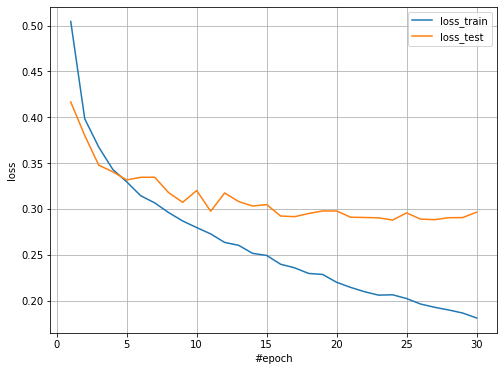

In [117]:
plt.figure(figsize=(8, 6))
plt.xlabel("#epoch")
plt.ylabel("loss")
plt.plot(np.arange(1,31), loss_train, label = 'loss_train')
plt.plot(np.arange(1,31), loss_test, label = 'loss_test')
plt.legend()
plt.grid(True)
plt.show()

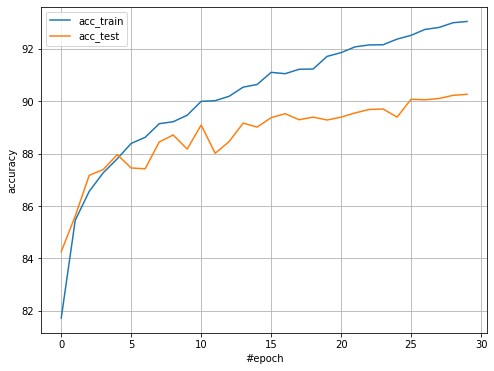

In [116]:
plt.figure(figsize=(8, 6))
plt.xlabel("#epoch")
plt.ylabel("accuracy")
plt.plot(accuracy_train, label = 'acc_train')
plt.plot(accuracy_test, label = 'acc_test')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
dataiter = iter(test_loader)
img, lab = dataiter.next()
pred = model(img)
predict = torch.max(pred.data, 1)[1]
correct = (predict == lab).sum()
accuracy = 100 * correct / float(len(lab))

In [114]:
print("Accuracy: {} %".format(float(accuracy)))

Accuracy: 92.1875 %


Here you can notice that the network is not overfitted and we got better metrics to show

### Conclusions:
_Write down small report with your conclusions and your ideas._

- From this laboratory work, we can conclude that the network is very easy to retrain and you need to monitor this.
- Be sure to include Batchnorm and Dropout in deep networks, and you should also monitor the number of epochs.
- Deep networks do give better results than short networks, but we need to monitor the regularization.
 - short network accuracy - 91.4%
 - deep network accuracy - 89.1%
 - deep network with regularization - 92.2% 